# Исследовательский анализ данных интернет-магазина «Стримчик»

**Описание проекта**

Интернет-магазину «Стримчик», который продаёт компьютерные игры по всему миру, необходимо выявить закономерности, определяющие успешность игры. Это поможет им сделать ставку на потенциально популярные продукты и спланировать эффективные рекламные кампании. Сейчас конец 2016 года, и им нужно подготовиться к компании на 2017 год.

**Описание данных**

В распоряжении магазина есть данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года.

**Цель исследования**

Цель исследования — выявить закономерности, которые определяют успешность игры.

**Ход исследования**

1. Подготовка данных: загрузка и изучение общей информации из предоставленных данных.
2. Предобработка данных: поиск и обработка пропущенных значений, поиск дубликатов, корректировка типов данных. Создание нового столбца с суммарными продажами во всех регионах.
3. Провести исследовательский анализ данных:
  * выявить, сколько игр выпускалось в разные годы;
  * просмотреть, как менялись продажи по платформам, и определить платформы с наибольшими суммарными продажами;
  * установить период популярности платформ;
  * определить актуальный период и платформы для изучения;
  * изучить потенциально прибыльные платформы;
  * построить график «ящик с усами» по глобальным продажам игр для каждой платформы;
  * просмотреть, как влияют на продажи отзывы пользователей и критиков;
  * соотнести выводы с продажами игр на других платформах;
  * изучить распределение игр по жанрам;
  * выявить самые прибыльные жанры и жанр, игры в котором продаются хуже.
4. Составление портрета пользователя в каждом регионе.
5. Проверка гипотез:
  * первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
  * вторая гипотеза о том, что средние пользовательские оценки для жанров Action и Sports отличаются.
* Общий вывод: подведение итогов, формирование ключевых выводов.

#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


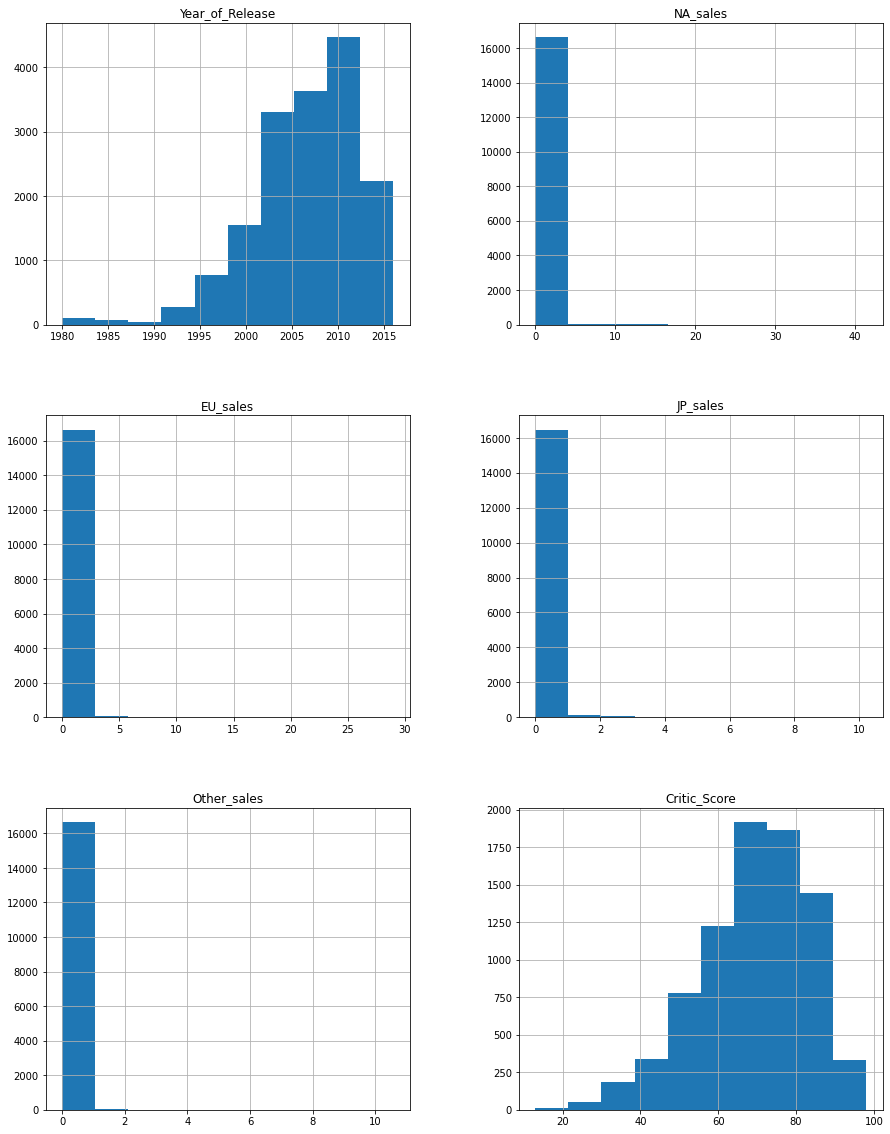

In [4]:
data.hist(figsize=(15, 20)); # гистограммы для всех числовых столбцов таблицы

In [5]:
data.duplicated().sum() # проверяем, есть ли явные дубликаты в данных

0

In [6]:
data.isna().sum() # проверяем пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

После анализа данных стало ясно, что они требуют доработки. В них есть пропущенные значения и ошибки в типах данных. На первый взгляд, в них нет аномальных значений, и явных дубликатов также не обнаружено. Необходимо изменить названия столбцов.

Перейдем к предобработка данных.

#### Предобработка данных

Начнем с изменения названия столбцов, приведём их к нижнему регистру.

In [7]:

data.columns = data.columns.str.lower() 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем данные в подходящие типы. Начнём со столбца «year_of_release», здесь должны быть целые числа. В столбце присутствуют пропуски, их менее 2 процентов, удалим их.

In [8]:
data = data.dropna(subset = ['year_of_release'])
data.isna().sum() # проверяем

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [9]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Удаляем строки с пропусками в столбцах «name» и «genre», так как потеря данных незначительна, и нет возможности заполнить их без дополнительного запроса информации.

In [10]:
data = data.dropna(subset=['name', 'genre'])
data.isna().sum() # проверяем

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце «user_score» необходимо изменить тип данных, так как оценка — это число. Посмотрим какие значения есть в этом столбце.

In [11]:
data['user_score'].unique()

#data['user_score'] = data.loc[:,'user_score'].astype(float)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Отсутствуют аномальные значения (более 10 и отрицательные). Однако было выявлено значение «tbd». Давайте рассмотрим его подробнее.

In [12]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Строк со значениями очень много, и непонятно, как они были получены. Просто удалить их не получится. Предлагаю обозначить значения «tbd» как пустые и заменить их на «nan». Для этого создадим функцию и используем её для замены. Это нужно для того, чтобы изменить тип данных в столбце на число с плавающей точкой.

In [13]:
def replace_user_scores(bug, correct):
    data['user_score'] = data['user_score'].replace(bug, correct)
replace_user_scores('tbd', np.NaN)
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
#  изменим тип данных в столбце на число с плавающей точкой
data['user_score'] = data.loc[:,'user_score'].astype(float)
data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
data['critic_score'].describe() 

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

В столбцах critic_score (оценка критиков), user_score (оценка пользователей) есть много пропущенных значений. Удалять эти данные нельзя, поскольку они составляют значительную часть всех данных. Мы проанализируем имеющиеся данные и заполним пропуски для более удобной работы с ними. Пропуски в столбцах, вероятно, связаны с тем, что игры не были оценены, или с недавним выходом игры, из-за чего оценка ещё не была выставлена.

In [17]:
data.loc[data['critic_score'].isna(), 'critic_score'] = -1

In [18]:
data.loc[data['user_score'].isna(), 'user_score'] = -1
data.isna().sum() # проверяем

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

В столбце с рейтингом вместо пропущенных данных будем писать «undefined». Это связано с тем, что пропущенных значений слишком много, и просто удалить их нельзя. А чтобы заполнить пропуски, нужно изучить каждую игру, что сейчас не представляется возможным. Вероятно, пропуски в этом столбце появились из-за отсутствия оценки.

In [19]:
data.loc[data['rating'].isna(), 'rating'] = 'undefined'
data.isna().sum() # проверяем

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [20]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,undefined
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,undefined
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,undefined


In [21]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Пропуски исправлены. В столбцах «жанр» и «платформа» дубликатов не обнаружено. Теперь перейдём к подсчёту общих продаж по всем регионам. Создадим для этого новый столбец.

In [23]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,undefined,31.38


В результате предварительной обработки данных были заполнены пропуски в столбцах name, genre, year_of_release, critic_score, user_score и rating. 

В столбцах year_of_release и user_score мы изменили тип данных на более подходящий. 

Изменили названия столбцов, привели их к нижнему регистру.

Проверили данные на наличие аномальных значений и дубликатов.

Также был создан столбец с общими продажами по всем регионам. 

#### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Узнаем важны ли данные за все периоды.

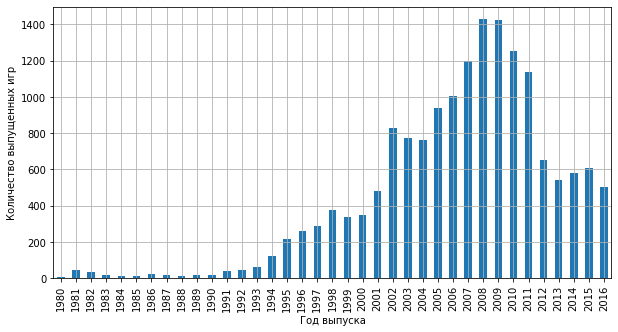

In [24]:
data.groupby('year_of_release')['year_of_release'].count()\
.plot(xlabel = 'Год выпуска', ylabel = 'Количество выпущенных игр', kind='bar', grid=True, figsize=(10, 5));

In [25]:
len(data[data['year_of_release']<1995])

486

Пик выпуска игр пришёлся на период с 2006 по 2011 год. После этого их выпуск начал снижаться. До 1995 года объём данных был небольшим, поэтому при анализе их можно не учитывать, чтобы получить более точную картину.

Давайте посмотрим, как менялись продажи в зависимости от платформы. Выберем платформы с самыми высокими общими продажами и отобразим эти данные по годам. Так мы сможем понять, за какой период появляются новые платформы и исчезают старые.

In [26]:
# Создадим сводную таблицу и объединим в ней данные о продажах по платформам
data_pivot = data.pivot_table(
    index=['platform', 'year_of_release'], values='total_sales', aggfunc=('sum'))
data_pivot

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [27]:
# Определим платформы с наибольшим суммарным объёмом продаж
data_pivot_total_sales = data_pivot.pivot_table(
    index=['platform'], values='total_sales', aggfunc=('sum')).sort_values(by='total_sales', ascending=False).head(5)
data_pivot_total_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


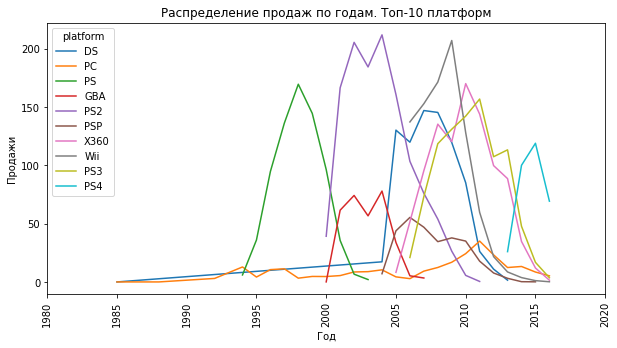

In [28]:
data_plot = (data.query('platform == ["PS2","X360","PS3","Wii", "DS", "PS","GBA","PS4","PSP", "PC"]')
    .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release', ascending=True)    
).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=data_plot, x='year_of_release', y='total_sales', hue='platform')
plt.xticks(rotation=90)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[int(year) for year in plt.gca().get_xticks()])
plt.title('Распределение продаж по годам. Топ-10 платформ')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

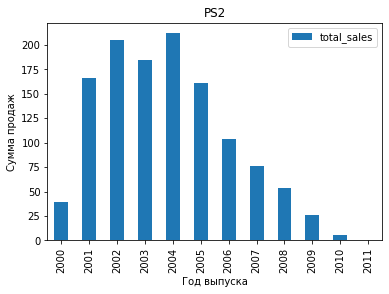

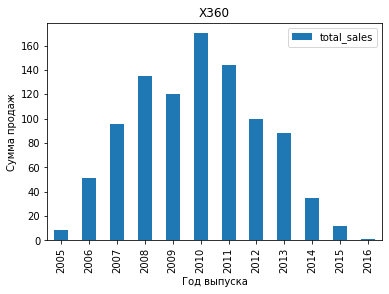

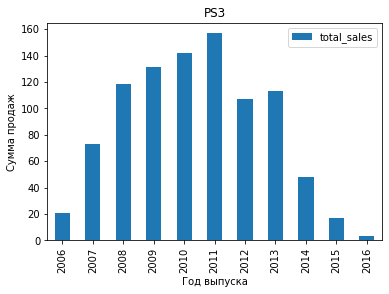

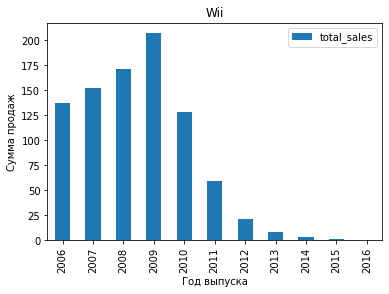

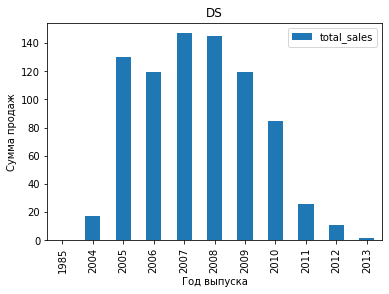

In [29]:
data_plot2 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
for platform in data_plot2.index:
    data[data['platform'] == platform].pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
        ).plot(kind='bar', title=platform, xlabel='Год выпуска', ylabel='Сумма продаж')
    plt.show()

Из графиков видно, что обычно платформы пользуются популярностью в течение двух-трёх лет, после чего продажи резко снижаются, и на смену им приходят новые платформы.

Для дальнейшего анализа мы рассмотрим последние три года, так как это соответствует средней продолжительности «жизни» платформы. Поскольку для дальнейшей работы необходимы данные за актуальный период, мы удалим информацию, относящуюся к более ранним периодам, чем 2014 год. Также рассмотрим игровые платформы, которые в период с 2014 по 2016 год демонстрировали высокие показатели продаж и были на пике популярности. Найдем их.

In [30]:
data_start = data # сохраним эти данные в переменной. Возможно, они пригодятся нам в дальнейшей работе
data = data[data['year_of_release'] >= 2014]
data_filter = data.groupby(data['platform'])['na_sales','eu_sales', 'jp_sales', 'total_sales']\
.sum().sort_values(by='total_sales', ascending=False)
data_filter

/tmp/ipykernel_146/4079195038.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_filter = data.groupby(data['platform'])['na_sales','eu_sales', 'jp_sales', 'total_sales']\


,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS4,98.61,130.04,15.02,288.15
XOne,81.27,46.25,0.32,140.36
3DS,22.64,16.12,44.24,86.68
PS3,22.05,25.54,11.22,68.18
X360,28.30,15.49,0.08,48.22
WiiU,19.36,13.15,7.31,42.98
PC,7.23,17.97,0.00,27.05
PSV,2.52,3.53,14.54,22.40
Wii,2.08,2.59,0.00,5.07


Из этой таблицы видно, что самыми популярными и прибыльными платформами являются Xbox One, PS4, 3DS, PS3 и X360.Cосредоточимся на изучении 5 наиболее успешных и популярных платформ последних лет таких как: Xbox One (продажи которой в последнее время снижаются) и PS4 (которая сейчас на пике популярности, но, возможно, доходы будут расти и дальше, или же, как и у других платформ, произойдёт спад из-за долгого присутствия на рынке в условиях динамичного рынка компьютерных игр) и т.д.

Давайте отфильтруем данные для дальнейшего анализа, чтобы сделать прогноз на 2017 год.

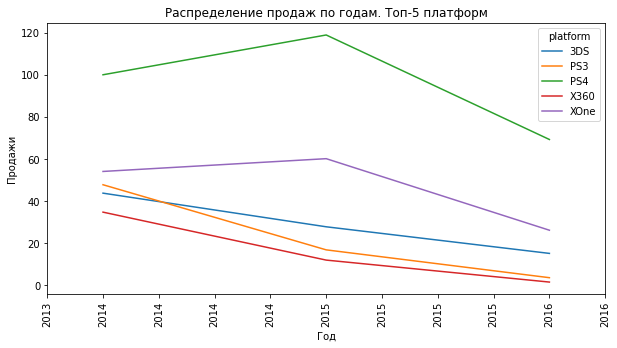

In [31]:
data_plot = (data.query('platform == ["PS4","XOne", "3DS", "PS3", "X360"]')
    .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release', ascending=True)    
).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=data_plot, x='year_of_release', y='total_sales', hue='platform')
plt.xticks(rotation=90)
plt.xticks(ticks=plt.gca().get_xticks(), labels=[int(year) for year in plt.gca().get_xticks()])
plt.title('Распределение продаж по годам. Топ-5 платформ')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

In [32]:
data_best = data.query("platform == ['PS4', 'XOne', '3DS', 'PS3', 'X360']")
data_best

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,-1.0,-1.0,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,undefined,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,undefined,0.01


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [33]:
data_best.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


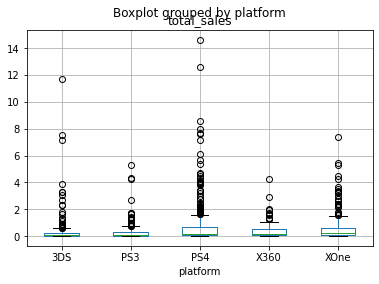

In [34]:
data_best.boxplot(column='total_sales', by='platform');

Построим диаграмму размаха для топ-10 платформ.

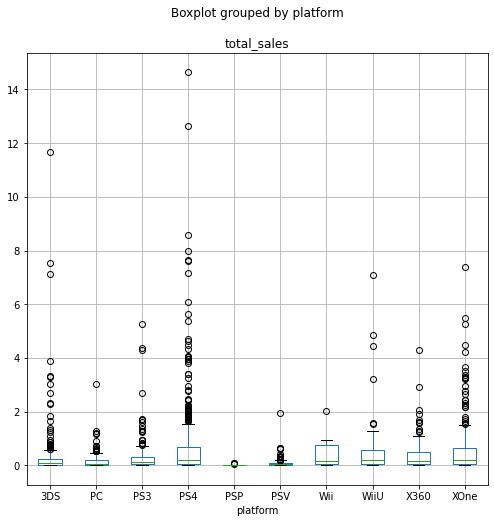

In [35]:
data.boxplot(column='total_sales', by='platform', figsize=(8, 8));

Очевидно, что есть случаи, когда доходы были выше обычных. Оставим эти данные без изменений, так как это могут быть удачные игры, которые принесли значительный доход.

Рассмотрим, как отзывы пользователей и критиков влияют на продажи внутри платформы «XOne». Для этого мы построим диаграмму рассеяния и рассчитаем корреляцию между этими отзывами и продажами. Затем мы сделаем выводы на основе полученных результатов.

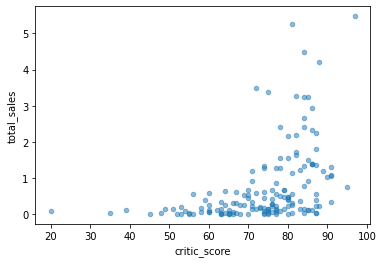

In [36]:
data[(data['platform'] == 'XOne')&(data['critic_score'] > 0)]\
.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);

In [37]:
# рассчитаем корреляцию
data_xone = data[data['platform'] == 'XOne']
data_xone['critic_score'].corr(data_xone['total_sales'])

0.27147591419241845

График демонстрирует, что с повышением оценки критиков продажи возрастают. Коэффициент корреляции между этими показателями составляет 0,27. Это говорит о наличии взаимосвязи, хотя и очень слабой.

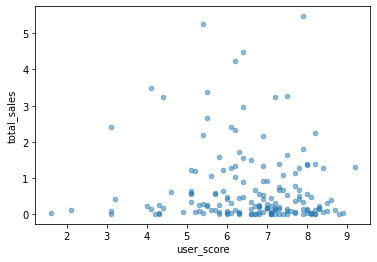

In [38]:
data[(data['platform'] == 'XOne')&(data['user_score'] > 0)].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5);

In [39]:
data_xone['user_score'].corr(data_xone['total_sales'])

0.10671381981034207

График демонстрирует, что с повышением оценки пользователей продажи возрастают. Коэффициент корреляции между этими показателями составляет 0,1. Это говорит о наличии взаимосвязи, хотя и очень слабой.


In [40]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


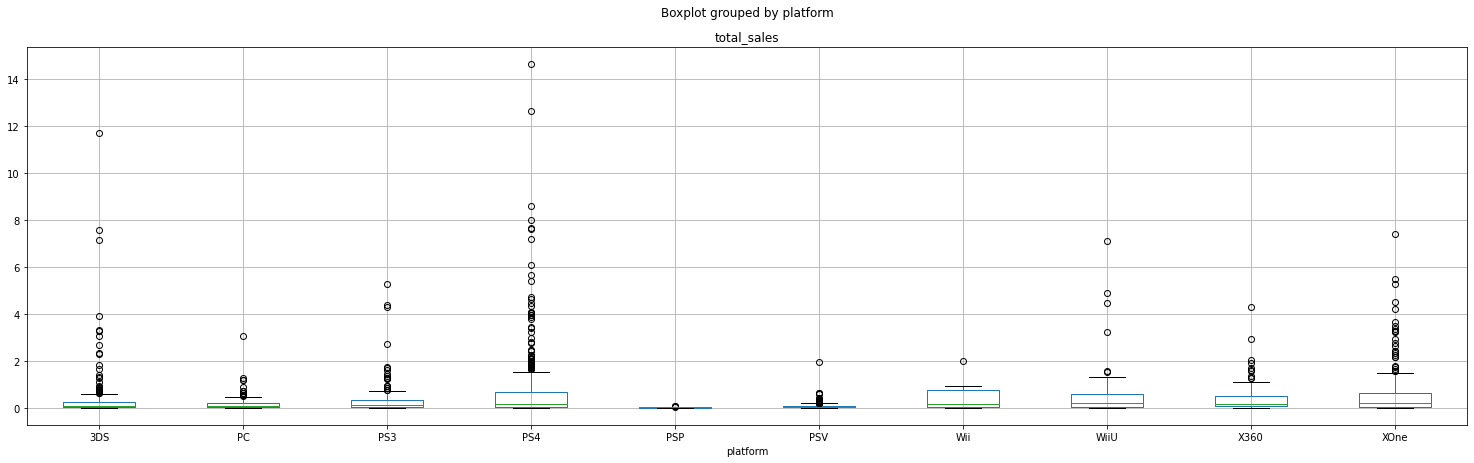

In [41]:
# Построим диаграмму разброса для актуальных платформ
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.show()

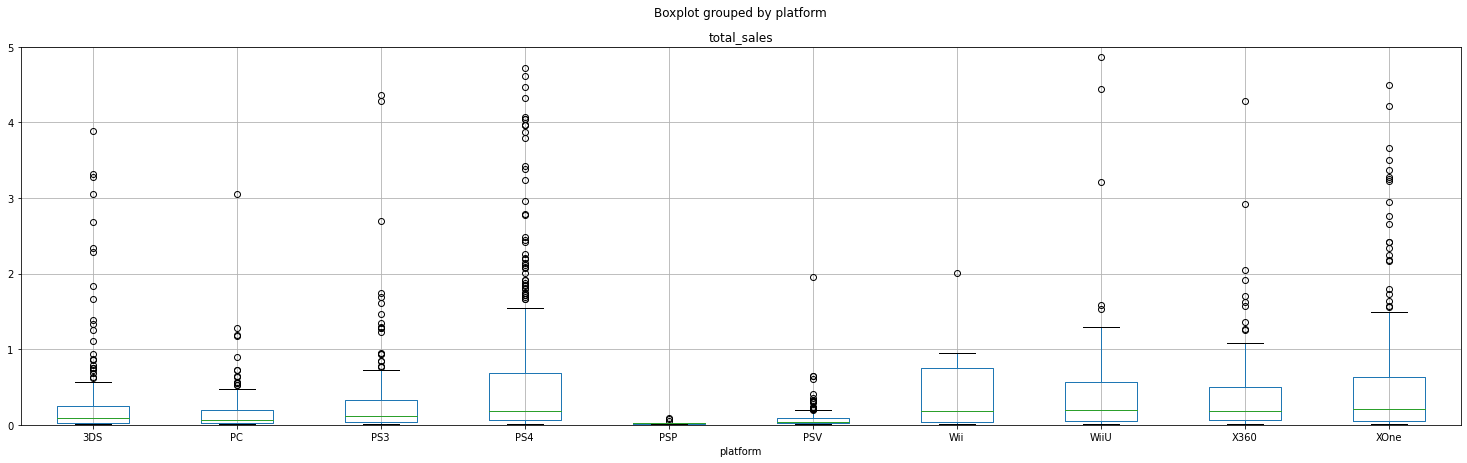

In [42]:
# Ещё детальнее, ограничив объём продаж до 5 миллионов.
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 5)
plt.show()

Из графиков разброса видно, что медианное значение количества игр с высокими продажами на большинстве платформ довольно низкое. Однако есть несколько платформ-лидеров, которые отличаются более широким диапазоном значений. Это указывает на то, что на этих платформах было больше игр с высокими показателями продаж.

Также можно заметить, что большой размах у платформы которая выделяется как новаторы в игровой индустрии. Это, например, Wii. Эта платформа предлагала новые способы игры, что, вероятно, привлекло внимание игроков и способствовало росту продаж игр на этой платформе.

Посмотрим на общее распределение игр по жанрам.

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: total_sales, dtype: int64

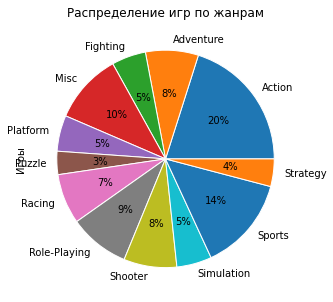

In [43]:
data_start.groupby('genre')['total_sales'].count().plot\
(ylabel = 'Игры', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение игр по жанрам', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data_start.groupby('genre')['total_sales'].count()

Давайте рассмотрим средние продажи игр в разных жанрах.

genre
Action          0.519057
Adventure       0.180456
Fighting        0.528865
Misc            0.459204
Platform        0.940262
Puzzle          0.421599
Racing          0.590122
Role-Playing    0.628683
Shooter         0.803519
Simulation      0.452695
Sports          0.567940
Strategy        0.256419
Name: total_sales, dtype: float64

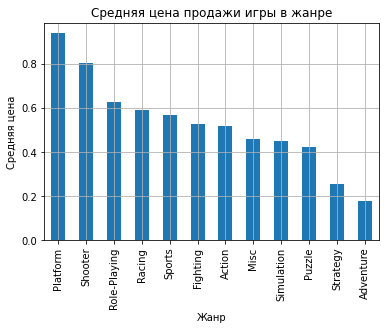

In [44]:
data_average_price = data_start.groupby('genre')['total_sales'].sum()/data_start.groupby('genre')['total_sales'].count()
data_average_price.sort_values(ascending=False).plot(kind='bar', grid=True, title = 'Средняя цена продажи игры в жанре',\
                        xlabel = 'Жанр', ylabel = 'Средняя цена');
data_average_price

Самые дорогие игры (средняя цена игр) наблюдается в жанрах Platform, Shooter и Role-Playing, а самые низкие средние цены — в Adventure и Strategy.

Больше всего игр представлено в жанрах Action, Sports и Misc, а меньше всего — в жанрах Strategy и Puzzle.

В результате проведённого исследования мы пришли к следующим выводам:

* Наибольшее количество игр было выпущено в период с 2006 по 2011 годы. После этого их выпуск начал постепенно снижаться.
* Платформы обычно пользуются популярностью в течение двух-трёх лет, после чего их продажи резко падают, и на смену им приходят новые платформы.

В ходе работы мы отфильтровали данные, оставив только актуальные и прибыльные платформы текущего времени: Xbox One и PS4. У этих платформ доходы часто выше обычных, а их игры пользуются большим спросом.

Также мы выяснили, что существует низкая положительная корреляция между суммой продаж и отзывами пользователей и критиков.

Из графиков разброса видно, что количество игр с высокими продажами на большинстве платформ невысоко. Однако есть несколько лидеров с более широким диапазоном значений, что указывает на большее количество игр с высокими продажами на этих платформах.

Кроме того, мы заметили, что большой размах имеют платформы, которые выделяются как новаторы в игровой индустрии. Вероятно, это привлекает внимание игроков и способствует росту продаж игр на этих платформах.

Также мы рассмотрели общее распределение игр по жанрам и выявили жанры с высокой и низкой стоимостью.

Перейдем к составлению портрета пользователя каждого региона.

#### Составление портрета

Создадим портрет пользователя для каждого региона. Для начала определим, какие платформы наиболее популярны.

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

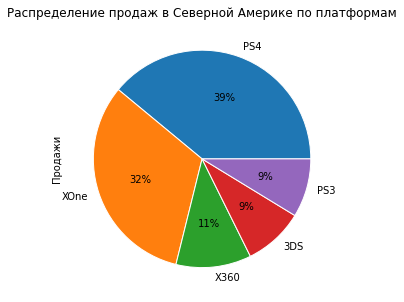

In [45]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж в Северной Америке по платформам', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

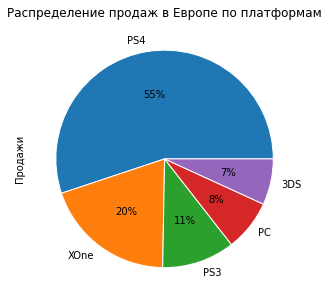

In [46]:
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж в Европе по платформам', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

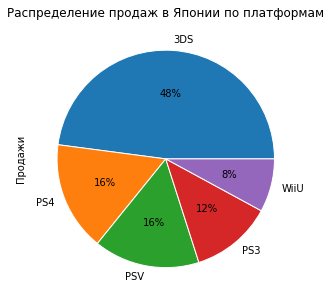

In [47]:
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж в Японии по платформам', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64

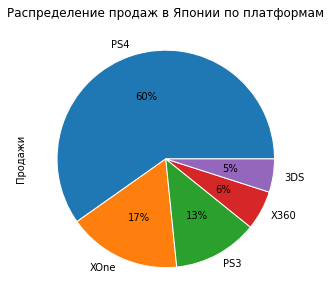

In [48]:
data.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж в Японии по платформам', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)

Результаты исследования оказались весьма занимательными. В Северной Америке из пяти самых популярных игровых платформ наибольшую долю продаж занимают PS4 (39%) и Xbox One (32%). В отличие от американского рынка, в Европе с большим отрывом лидирует PS4, занимая более половины продаж в топ-5 платформах. В Японии же почти половина (48%) продаж в популярных игровых платформах приходится на Nintendo 3DS.

Топ-5 платформ также различается в зависимости от региона. В Японии наиболее популярна Nintendo 3DS, которая производится на местном рынке, как и игровые платформы PS, ориентированные на потребителей своей страны. Замыкает топ-5 Японии также японская Wii U.

В Европе и Северной Америке топ-5 платформ схожи, но различаются по доле продаж. В Северной Америке в лидерах Xbox 360, которого нет в топ-5 Европы, а в Европе популярны игры на ПК.

В других странах самыми продаваемыми играми являются игры для PS4. Распределение по платформам похоже на европейское, но есть отличие: пользователи больше любят игры для X360, чем для PC.

Теперь определим самые популярные жанры игр в разных регионах (топ-5).

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

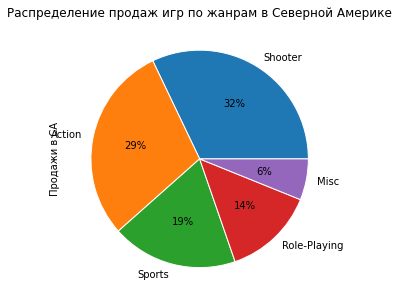

In [49]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи в СА', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж игр по жанрам в Северной Америке', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

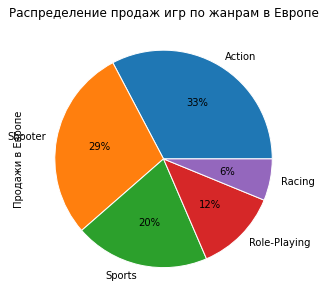

In [50]:
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи в Европе', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж игр по жанрам в Европе', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

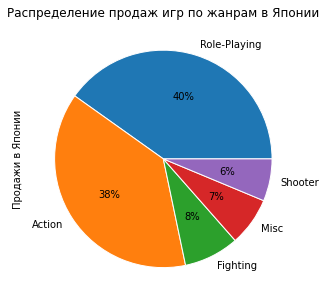

In [51]:
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи в Японии', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж игр по жанрам в Японии', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Name: other_sales, dtype: float64

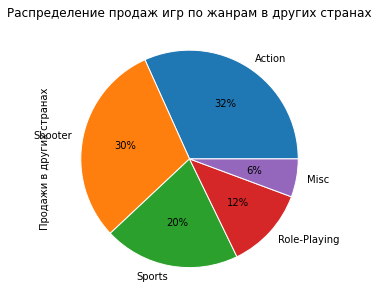

In [52]:
data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5).plot\
(ylabel = 'Продажи в других странах', kind='pie', autopct = '%1.0f%%', figsize=(5,5),\
title = 'Распределение продаж игр по жанрам в других странах', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)

Анализ данных показывает, что в выборе игр между Японией и другими странами есть существенные различия. В Японии наиболее популярны ролевые игры, в то время как в других регионах, таких как Европа, Северная Америка и в других странах, лидируют экшен и шутеры.

В Северной Америке и других странах популярны разнообразные игры (Misc), в то время как в Европе значительную долю рынка занимают гоночные игры. Игры в жанре Sports пользуются спросом во всех регионах (около 20% от топ-5 продаж), но в Японии они не так популярны, как в других странах.

Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [53]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,undefined,7.98


rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

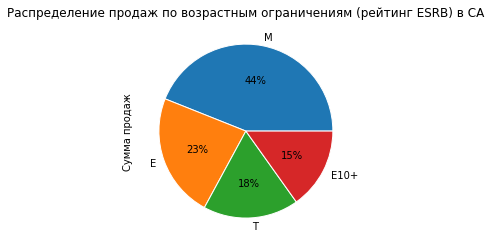

In [54]:
data_ESRB = data[data['rating'] != 'undefined']
data_ESRB.groupby('rating')['na_sales'].sum().sort_values(ascending=False)\
.plot(kind='pie', autopct = '%1.0f%%', title = 'Распределение продаж по возрастным ограничениям (рейтинг ESRB) в СА',\
      xlabel = 'Возрастная категория в соответствии с рейтингом ESRB',\
      ylabel = 'Сумма продаж', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data_ESRB.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

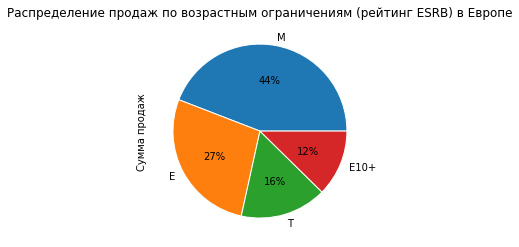

In [55]:
data_ESRB.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)\
.plot(kind='pie', autopct = '%1.0f%%', title = 'Распределение продаж по возрастным ограничениям (рейтинг ESRB) в Европе',\
      xlabel = 'Возрастная категория в соответствии с рейтингом ESRB', ylabel = 'Сумма продаж',\
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data_ESRB.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

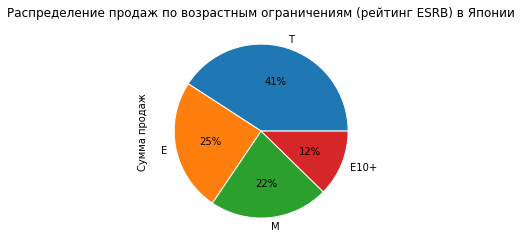

In [56]:
data_ESRB.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)\
.plot(kind='pie', autopct = '%1.0f%%', title = 'Распределение продаж по возрастным ограничениям (рейтинг ESRB) в Японии',\
      xlabel = 'Возрастная категория в соответствии с рейтингом ESRB', ylabel = 'Сумма продаж',\
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data_ESRB.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
M       28.67
E       15.39
T       11.33
E10+     7.83
Name: other_sales, dtype: float64

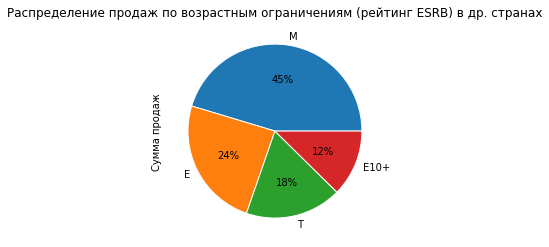

In [57]:
data_ESRB.groupby('rating')['other_sales'].sum().sort_values(ascending=False)\
.plot(kind='pie', autopct = '%1.0f%%', title = 'Распределение продаж по возрастным ограничениям (рейтинг ESRB) в др. странах',\
      xlabel = 'Возрастная категория в соответствии с рейтингом ESRB', ylabel = 'Сумма продаж',\
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
data_ESRB.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

В разных регионах распределение продаж игр по возрастным классификациям похоже, за исключением Японии. В большинстве регионов лидируют игры с возрастной рекомендацией «M» («Для взрослых»). Однако в Европе чуть больше покупают игры с пометкой «E» («Для всех»).

В Японии же наблюдается интересная особенность: здесь больше всего продаются игры, предназначенные для подростков (от 13 лет и старше) с пометкой «T». По сравнению с другими регионами, продажи игр для взрослых в Японии примерно в два раза ниже, относительно других регионов.

Если говорить о портрете игрока в Северной Америке, то это человек, который с большой вероятностью выберет платформу PS4 (39%) или Xbox One (32%). Он предпочитает играть в экшн-игры или шутеры, а также любит спортивные, ролевые и музыкальные игры. Американский геймер отдаёт предпочтение играм, отнесенным к категории для взрослых.

В Европе ситуация немного отличается, но схожа с Северной Америкой. Здесь наблюдается явное лидерство платформы PS4, большая любовь к гоночным играм по сравнению с другими регионами и более частый выбор игр в категории «для всех», относительно других регионов. Но всё так же лидируют игры в жанре экшн и шутеры, а также часто выбирают спортивные и ролевые игры.

Японский пользователь отличается от остальных. Самой популярной платформой для них является Nintendo 3DS. Японские геймеры предпочитают ролевые игры и выбирают игры, отнесённые к категории «для подростков» (13+).

#### Проверка гипотез

Проверяем гипотезы, начнем с проверки того является ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Мы будем использовать t-критерий Стьюдента, чтобы сравнить средние значения двух независимых выборок и определить, есть ли существенные различия между этими группами.

In [58]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

data_xone = data_xone[data_xone['user_score'] > 0]
data_pc = data[(data['platform'] == 'PC')&(data['user_score'] > 0)]

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
   print('Не получилось опровергнуть нулевую гипотезу')

0.10450507919348415
Не получилось опровергнуть нулевую гипотезу


Гипотезу не получилось опровергнуть. Проверим следующую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

За нулевую гипотезу возьме - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза: рейтинг игр в жанре Action выше. 

Альтернативная гипотеза была выбрана, потому что игры в жанре Action пользуются большей популярностью, чем игры в жанре Sports. Можно предположить, что их рейтинг среди пользователей выше. Здесь так же будем использовать t-критерий Стьюдента, чтобы сравнить средние значения двух независимых выборок и определить, есть ли существенные различия между этими группами.

In [59]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

data_action = data[(data['genre'] == 'Action')&(data['user_score'] > 0)]
data_sports = data[(data['genre'] == 'Sports')&(data['user_score'] > 0)]

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], alternative = 'greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
   print('Не получилось опровергнуть нулевую гипотезу')

1.4355573992552932e-19
Отвергаем нулевую гипотезу


Первая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не была опровергнута.

Вторая гипотеза, согласно которой средние пользовательские рейтинги для жанров Action и Sports различаются, также не была опровергнута.

Перейдем к выводам по проделанной работе.

#### Общий вывод

После загрузки данных было выявлено, что они требуют доработки. Были найдены пропущенные значения и ошибки в типах данных. 

При предобработке данных было сделано следующее: 
* Были заполнены пропуски в столбцах name, genre, year_of_release, critic_score, user_score и rating. 
* В столбцах year_of_release и user_score изменили тип данных на более подходящий. 
* Изменили названия столбцов, привели их к нижнему регистру. 
* Проверили данные на наличие аномальных значений и дубликатов. 
* Создали столбец с общими продажами по всем регионам. 
По результатам исследовательского анализа можно сказать следующее: 
* Наибольшее количество игр было выпущено в период с 2006 по 2011 годы. После этого их выпуск начал постепенно снижаться. 
* Платформы обычно пользуются популярностью в течение двух-трёх лет, после чего их продажи резко падают, и на смену им приходят новые платформы. 

В ходе работы мы отфильтровали данные, оставив только актуальные и прибыльные платформы текущего времени: Xbox One и PS4. У этих платформ доходы часто выше обычных, а их игры пользуются большим спросом. 

Также мы выяснили, что существует низкая положительная корреляция между суммой продаж и отзывами пользователей и критиков. 

Из графиков разброса видно, что количество игр с высокими продажами на большинстве платформ невысоко. Однако есть несколько лидеров с более широким диапазоном значений, что указывает на большее количество игр с высокими продажами на этих платформах. 

Кроме того, мы заметили, что большой размах имеют платформы, которые выделяются как новаторы в игровой индустрии. Вероятно, это привлекает внимание игроков и способствует росту продаж игр на этих платформах. 

Также мы рассмотрели общее распределение игр по жанрам и выявили жанры с высокой и низкой стоимостью. Самые дорогие игры (средняя цена игр) наблюдается в жанрах Platform, Shooter и Role-Playing, а самые низкие средние цены — в Adventure и Strategy. 

Больше всего игр представлено в жанрах Action, Sports и Misc, а меньше всего — в жанрах Strategy и Puzzle. 

Если говорить о портрете:
* Игрока в Северной Америке, то это человек, который с большой вероятностью выберет платформу PS4 (39%) или Xbox One (32%). Он предпочитает играть в экшн-игры или шутеры, а также любит спортивные, ролевые и музыкальные игры. Американский геймер отдаёт предпочтение играм, отнесённым к категории для взрослых. 

* В Европе ситуация немного отличается, но схожа с Северной Америкой. Здесь наблюдается явное лидерство платформы PS4, большая любовь к гоночным играм по сравнению с другими регионами и более частый выбор игр в категории «для всех» относительно других регионов. Но всё так же лидируют игры в жанре экшн и шутеры, а также часто выбирают спортивные и ролевые игры. 

* Японский пользователь отличается от остальных. Самой популярной платформой для них является Nintendo 3DS. Японские геймеры предпочитают ролевые игры и выбирают игры, отнесённые к категории «для подростков» (13+). 

Относительно гипотез:

* Первая гипотеза, которая предполагает, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не была опровергнута.

* Вторая гипотеза о том, что средние пользовательские оценки для жанров Action и Sports не совпадают, также не была опровергнута.

Исходя из вышесказанного, можно сделать вывод, что сейчас на пике популярности игры для платформы PS4. Особенно востребованы экшн-игры и шутеры, а также спортивные, ролевые и музыкальные игры.

Определённо, пользуются спросом игры из рейтинга ESRB, которые предназначены для взрослых. Поскольку срок жизни игровых платформ составляет примерно 2-3 года, важно быть в курсе последних тенденций в мире игр. Новаторские идеи, принципиально новые консоли и типы игр часто становятся хитами.